In [40]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.metrics

# Real world example: Digit Classification

We will now create a simple NN model to classify handwritten digits. We'll use the famous MNIST database which comes with the Keras library.

## Loading and exploring the dataset

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

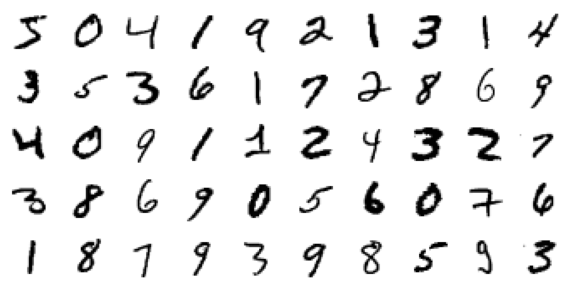

In [6]:
f, axes = plt.subplots(5, 10, figsize=(10, 5))
axes = axes.flatten()
for i in range(50):
    axes[i].imshow(x_train[i,:,:], cmap=plt.get_cmap('binary'))
    axes[i].axis('off')

In [7]:
print(np.min(x_train))
print(np.max(x_train))

0
255


## Simple Feed Forward Neural Network

We'll use a simple feed forward neural network classifier to predict the digit given the input pixels. The architecture of this network is as follows:

![alt text](figures/mnist_ff.jpg)

* Pixels in each input image will be flattened so that they form a vector of $28 \times 28 = 784$ numbers.
* Given this vector as input, the neural network will predict the associated digit.

### Normalizing Inputs

Neural networks train best when the magnitude of the inputs is small. But as you saw earlier, each pixel in the image takes values from 0 to 255, which is too big a range. Therefore, we must normalize the inputs. For this example, we'll rescale the pixel values so that they are between 0 and 1.

In [8]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

### Flattening the inputs

Now, we will flatten the inputs so that they become vectors of 784 numbers.

In [13]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] * x_test.shape[2]))

In [14]:
x_train.shape

(60000, 784)

### Categorizing the output

The classes in `y_train` and `y_test` are stored as numbers. We need to convert those to one-hot vectors as we did in multiclass classification.

In [25]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

### Training and Evaluation

In [34]:
# number of hidden units, try changing that
n_hidden = 10

model = keras.Sequential(
    [
        layers.InputLayer(input_shape=(x_train.shape[1],)),
        layers.Dense(n_hidden, activation='tanh'),
        layers.Dropout(0.5),
        layers.Dense(y_train_onehot.shape[1], activation="softmax"),
    ]
)
model.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                7850      
_________________________________________________________________
dropout_7 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [36]:
# train the model
h = model.fit(x = x_train, y=y_train_onehot, verbose=True, epochs=100, batch_size=x_train.shape[0] // 10)

Epoch 1/100
10/10 [==============================] - 0s 14ms/step - loss: 1.2440 - accuracy: 0.6293
Epoch 2/100
10/10 [==============================] - 0s 13ms/step - loss: 1.2127 - accuracy: 0.6405
Epoch 3/100
10/10 [==============================] - 0s 13ms/step - loss: 1.1874 - accuracy: 0.6451
Epoch 4/100
10/10 [==============================] - 0s 13ms/step - loss: 1.1684 - accuracy: 0.6479
Epoch 5/100
10/10 [==============================] - 0s 14ms/step - loss: 1.1429 - accuracy: 0.6566
Epoch 6/100
10/10 [==============================] - 0s 13ms/step - loss: 1.1203 - accuracy: 0.6631
Epoch 7/100
10/10 [==============================] - 0s 14ms/step - loss: 1.0989 - accuracy: 0.6661
Epoch 8/100
10/10 [==============================] - 0s 14ms/step - loss: 1.0825 - accuracy: 0.6679
Epoch 9/100
10/10 [==============================] - 0s 13ms/step - loss: 1.0674 - accuracy: 0.6716
Epoch 10/100
10/10 [==============================] - 0s 13ms/step - loss: 1.0524 - accuracy: 0.6756

In [38]:
# test the model
ypred = model.predict(x_test, batch_size=x_test.shape[1]//10)

In [41]:
# convert probabilistic outputs into hard decisions by just taking the element with the largest probability
ypred_hard = np.argmax(ypred, axis=1)

In [46]:
# compute accuracy
sklearn.metrics.accuracy_score(y_test, ypred_hard)

0.9064

In [47]:
# compute confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test, ypred_hard)
cm

array([[ 956,    1,    6,    1,    0,   10,    2,    1,    3,    0],
       [   0, 1106,    4,    5,    1,    0,    6,    2,   11,    0],
       [  12,    7,  909,   23,   13,    2,   20,    9,   33,    4],
       [   3,    0,   29,  900,    1,   23,    4,   22,   22,    6],
       [   0,    4,    4,    1,  917,    0,   15,    3,    6,   32],
       [  20,    1,    3,   49,   15,  722,   18,   15,   40,    9],
       [  19,    4,    6,    0,   11,   13,  899,    0,    6,    0],
       [   2,   16,   20,   13,    9,    0,    0,  926,    1,   41],
       [   6,   17,   11,   16,    8,   45,   14,   12,  833,   12],
       [  16,    6,    0,   10,   42,    4,    0,   28,    7,  896]])